In [14]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



In [91]:
filename = os.path.join(os.getcwd(), "chestpain.csv")
df = pd.read_csv(filename, header=0)


In [86]:
df.head()

,Age,Sex,Smoking,Typical chest pain,Diabetes,Risk of heart attack
0,30,M,N,1,N,20
1,30,M,Y,1,N,49
2,31,M,N,1,N,21
3,31,M,Y,1,N,51
4,32,M,N,1,N,23


In [87]:
df.shape

(410, 6)

In [88]:
df.dtypes

Age                      int64
Sex                     object
Smoking                 object
Typical chest pain       int64
Diabetes                object
Risk of heart attack     int64
dtype: object

In [89]:
df['Diabetes'].unique()

array(['N', 'Y'], dtype=object)

Converting textual features to integers

In [92]:
#Map no to 0 and yes to 1 for smoking
mapping = {'N': 0, 'Y': 1}
df['Smoking'] = df['Smoking'].map(mapping)
df['Smoking'].replace({'N': 0, 'Y': 1}, inplace=True)

#Map no to 0 and yes to 1 for diabetes
mapping2 = {'N': 0, 'Y': 1}
df['Diabetes'] = df['Diabetes'].map(mapping2)
df['Diabetes'].replace({'N': 0, 'Y': 1}, inplace=True)

#Map males to 0 and females to 1
mapping3 = {'M': 0, 'F': 1}
df['Sex'] = df['Sex'].map(mapping3)
df['Sex'].replace({'M': 0, 'F': 1}, inplace=True)
df

,Age,Sex,Smoking,Typical chest pain,Diabetes,Risk of heart attack
0,30,0,0,1,0,20
1,30,0,1,1,0,49
2,31,0,0,1,0,21
3,31,0,1,1,0,51
4,32,0,0,1,0,23
...,...,...,...,...,...,...
405,68,1,0,1,1,77
406,69,1,0,1,0,64
407,69,1,0,1,1,78
408,70,1,0,1,0,66


In [93]:
y = df['Risk of heart attack']
X = df.drop(columns=['Risk of heart attack'])

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [95]:
def train_test_knn(X_train, X_test, y_train, y_test, k):

    model = KNeighborsClassifier(n_neighbors=k)

    model.fit(X_train, y_train) 
    
    prediction= model.predict(X_test) 
    
    acc_score = accuracy_score(y_test, prediction)
    
    return acc_score

In [22]:
def visualize_accuracy(hyperparam_range, acc):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    p = sns.lineplot(x=hyperparam_range, y=acc, marker='o', label = 'Full training set')
        
    plt.title('Test set accuracy of the model predictions, for ' + ','.join([str(h) for h in hyperparam_range]))
    ax.set_xlabel('Hyperparameter value')
    ax.set_ylabel('Accuracy')
    plt.show()

In [96]:
def train_multiple_knns(k_range):
    
    accuracy_list = []
    
    for k in k_range:
        score = train_test_knn(X_train, X_test, y_train, y_test, k)
        accuracy_list.append(float(score))
    
    return accuracy_list

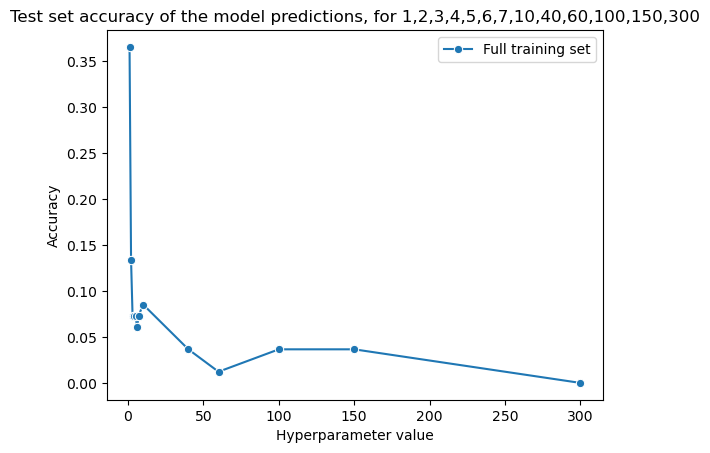

In [100]:
k_range = [1, 2, 3, 4, 5, 6, 7, 10, 40, 60, 100, 150, 300]
acc = train_multiple_knns(k_range)

visualize_accuracy(k_range, acc)